In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('sales_data.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
train_data = data[data['Date'] <= "2023-12-31"]

In [5]:
train_data = train_data.groupby('Date')['Demand'].sum().reset_index()

In [6]:
train_data['SMA'] = train_data['Demand'].rolling(7).mean()

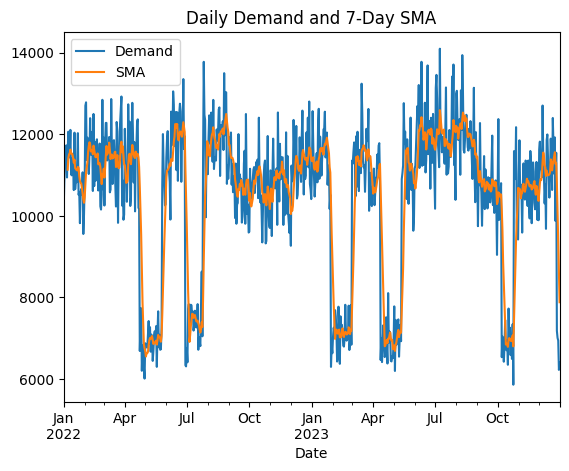

In [11]:
ax = train_data.plot(x='Date', y=['Demand', 'SMA'], title='Daily Demand and 7-Day SMA')